In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import xlrd
DATA_FILE = "data/fire_theft.xls"

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.1.0'

In [3]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])
n_samples = sheet.nrows-1

In [4]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [5]:
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [6]:
Y_hat = X*w+b

In [7]:
loss = tf.square(Y-Y_hat, name='loss')

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(loss)

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/03/linear_reg', sess.graph)
    
    #train model
    for i in range(100):
        total_loss = 0
        for x,y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
    writer.close()
    
    w1, b1 = sess.run([w,b])


Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

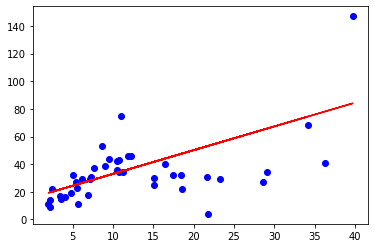

In [10]:
X, Y = data.T[0], data.T[1]
plt.plot(X,Y, 'bo')
plt.plot(X, w1*X+b1, 'r')
plt.show()